In [1]:
import sys

sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import data.drawings.make_tasks as drawing_tasks
from src.analysis_utilities import SynthesisExperimentAnalyzer
from src.config_builder import ExperimentType

/opt/conda/envs/laps/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
sns.set_theme(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(12, 8)})

In [5]:
%config InlineBackend.figure_format = 'retina'

In [24]:
# EXPERIMENT_NAME = "runs_re2"
# DOMAIN = "re2"

EXPERIMENT_NAME = "runs_clevr"
DOMAIN = "clevr"

COMPUTE_LIKELIHOODS = True

FIGURES_DIR = os.path.join("figures", EXPERIMENT_NAME)
FIGURES_DOMAIN_DIR = os.path.join("figures", EXPERIMENT_NAME, DOMAIN)
os.makedirs(FIGURES_DOMAIN_DIR, exist_ok=True)

In [25]:
analyzer = SynthesisExperimentAnalyzer(
    experiment_name=EXPERIMENT_NAME,
    allow_incomplete_results=True,
    compute_likelihoods=COMPUTE_LIKELIHOODS,
    batch_size = 96,
    seeds = [111, 222, 333],
)

Experiment directory: ../experiments_iterative/outputs/runs_clevr
Available domains: ['clevr']


# Analysis 1: Tasks solved over time

### Tasks solved vs. LAPS iteration

In [26]:
df = analyzer.get_synthesis_results_for_domain(DOMAIN)
df

,request,task,programs,best_search_time,split,seed,iteration,experiment_type
0,"{'constructor': '->', 'arguments': [{'construc...",0-1_compare_integer-Is the number of large rub...,[],NaN,train,111,0,baseline_dreamcoder
1,"{'constructor': '->', 'arguments': [{'construc...",1-1_compare_integer-Is the number of metal sph...,[{'program': '(lambda (clevr_gt? 1 (clevr_coun...,0.000127,train,111,0,baseline_dreamcoder
2,"{'constructor': '->', 'arguments': [{'construc...",2-1_compare_integer-Is the number of cyan rubb...,[{'program': '(lambda (clevr_eq_material (clev...,0.000136,train,111,0,baseline_dreamcoder
3,"{'constructor': '->', 'arguments': [{'construc...",3-1_compare_integer-Is the number of large cyl...,[],NaN,train,111,0,baseline_dreamcoder
4,"{'constructor': '->', 'arguments': [{'construc...",4-1_compare_integer-Is the number of small yel...,[],NaN,train,111,0,baseline_dreamcoder
...,...,...,...,...,...,...,...,...
6961,"{'constructor': '->', 'arguments': [{'construc...",5-2_transform-If all of the cyan cylinders bec...,[],NaN,test,333,9,baseline_dreamcoder
6962,"{'constructor': '->', 'arguments': [{'construc...",6-2_transform-If all of the gray cubes became ...,[],NaN,test,333,9,baseline_dreamcoder
6963,"{'constructor': '->', 'arguments': [{'construc...",7-2_transform-If all of the large purple thing...,[],NaN,test,333,9,baseline_dreamcoder
6964,"{'constructor': '->', 'arguments': [{'construc...",8-2_transform-If all of the small rubber spher...,[],NaN,test,333,9,baseline_dreamcoder


In [27]:
df_results = (
    df.groupby(["experiment_type", "seed", "iteration", "split"])
    .best_search_time.count()
    .reset_index(name="n_solved")
)

# Duplicate "benchmark_enumeration" for n_iterations
df_list = [df_results[df_results.experiment_type != "enumeration"]]
for iteration in sorted(df_results.iteration.unique()):
    df_tmp = df_results[df_results.experiment_type == "enumeration"].copy()
    df_tmp["iteration"] = iteration
    df_list.append(df_tmp)
df_results = pd.concat(df_list, axis=0).reset_index(drop=True)

df_results

,experiment_type,seed,iteration,split,n_solved
0,baseline_dreamcoder,111,0,test,45
1,baseline_dreamcoder,111,0,train,45
2,baseline_dreamcoder,111,1,train,108
3,baseline_dreamcoder,111,2,train,146
4,baseline_dreamcoder,111,3,test,97
5,baseline_dreamcoder,111,3,train,169
6,baseline_dreamcoder,111,4,train,177
7,baseline_dreamcoder,111,5,train,177
8,baseline_dreamcoder,111,6,test,99
9,baseline_dreamcoder,111,6,train,178


Text(0.5, 1.0, 'clevr')

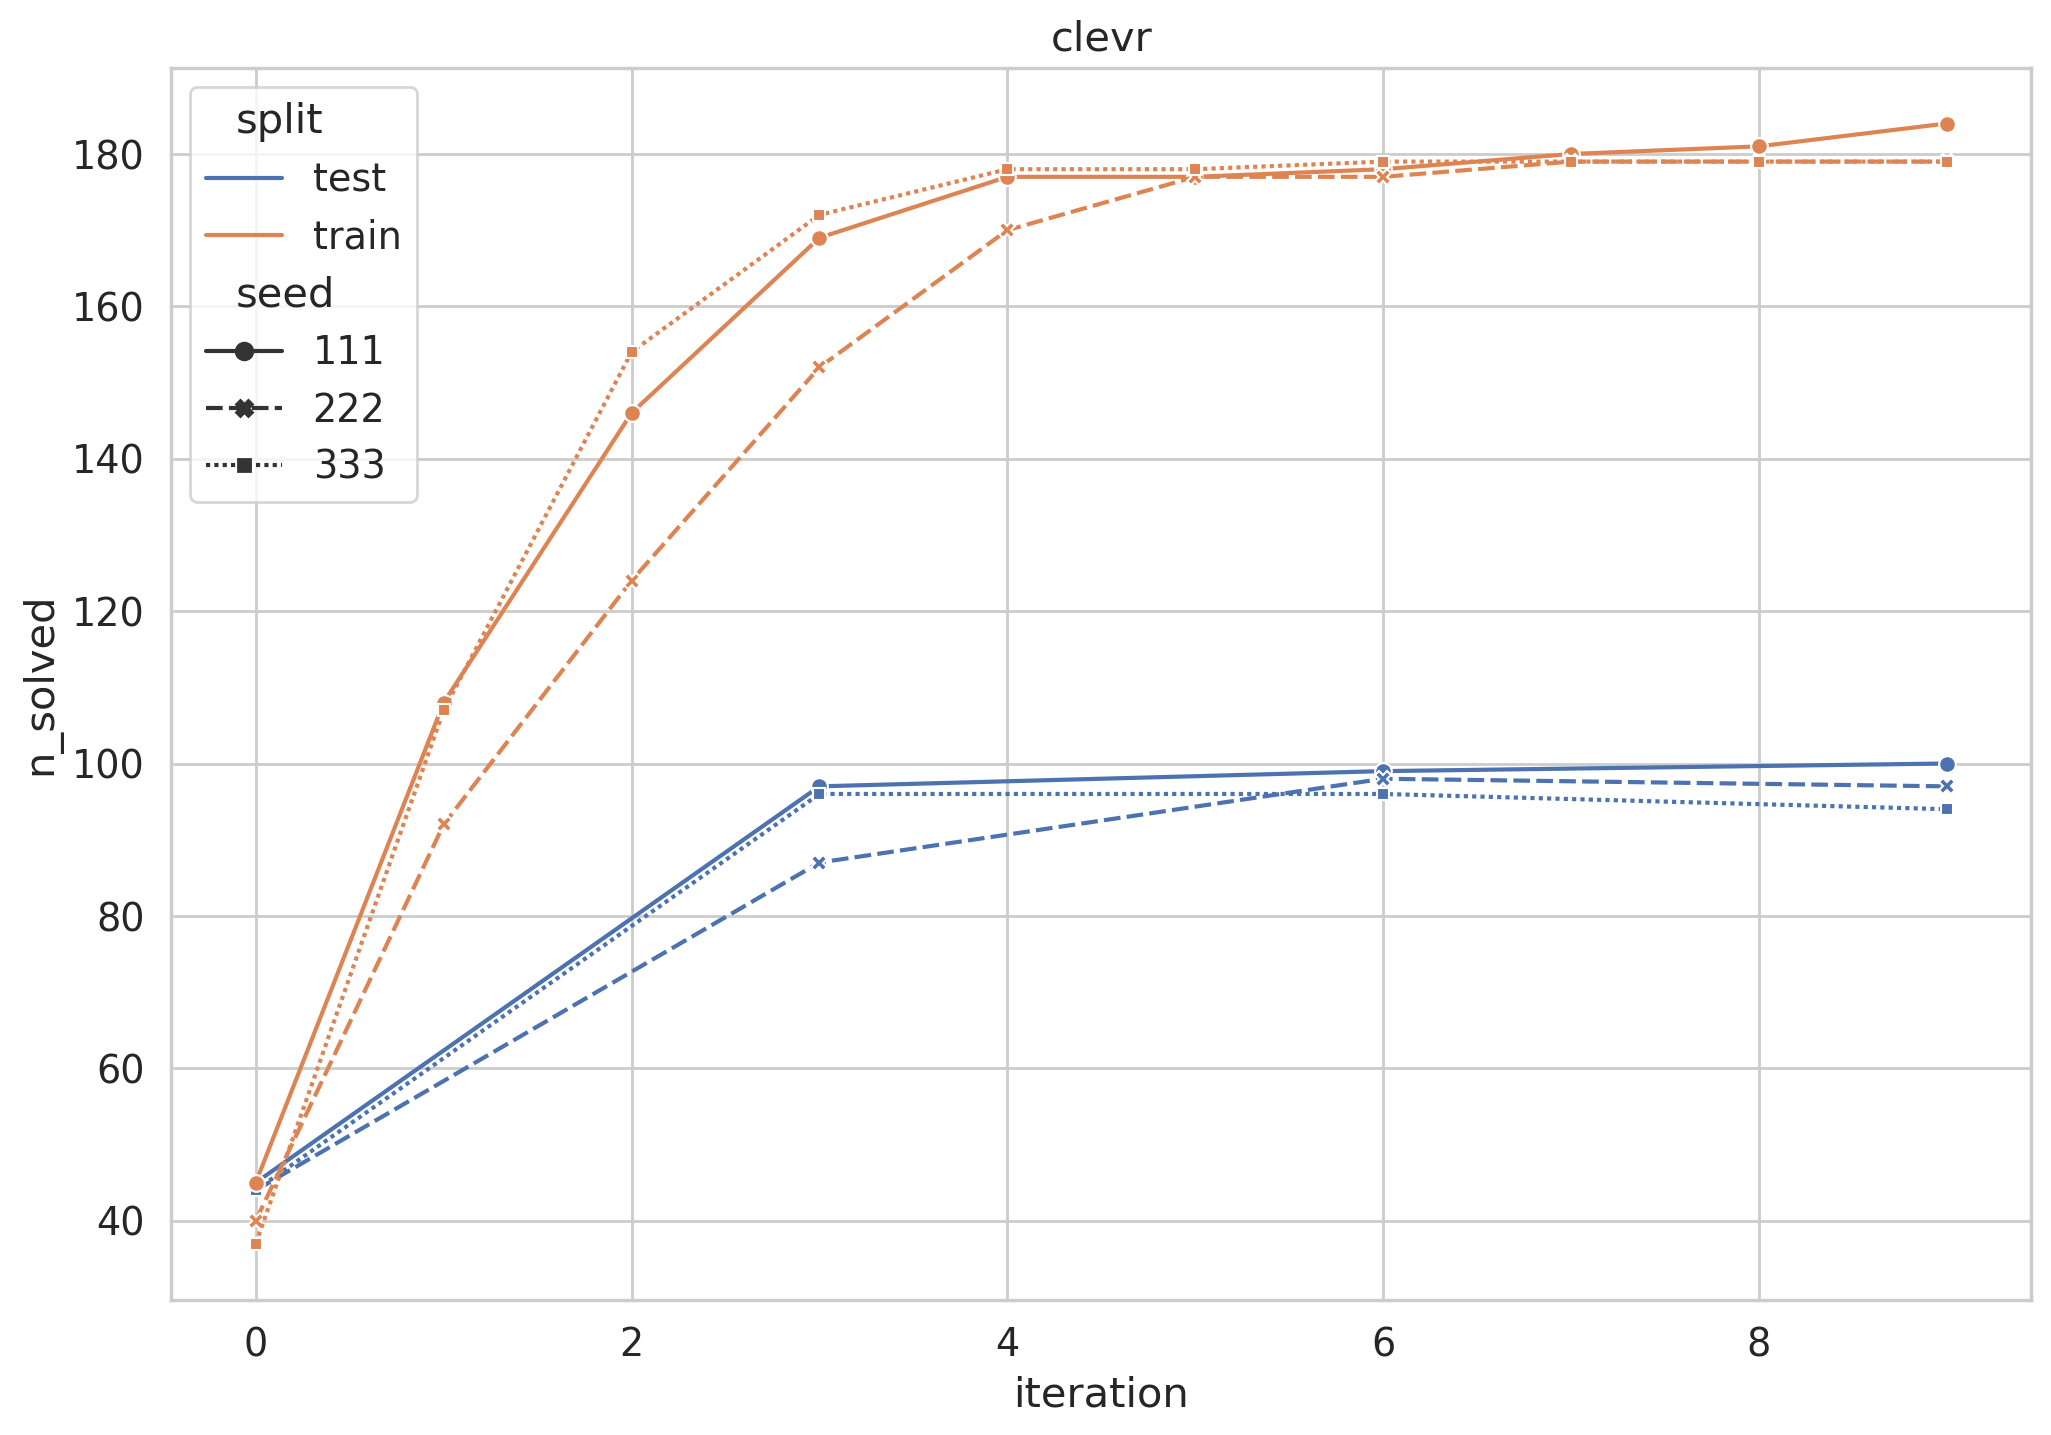

In [28]:
sns.lineplot(
    data=df_results, 
    x="iteration", 
    y="n_solved", 
    hue="split", 
    style="seed", 
    markers=True,
)
plt.title(f"{DOMAIN}")

Text(0.5, 1.0, 'clevr')

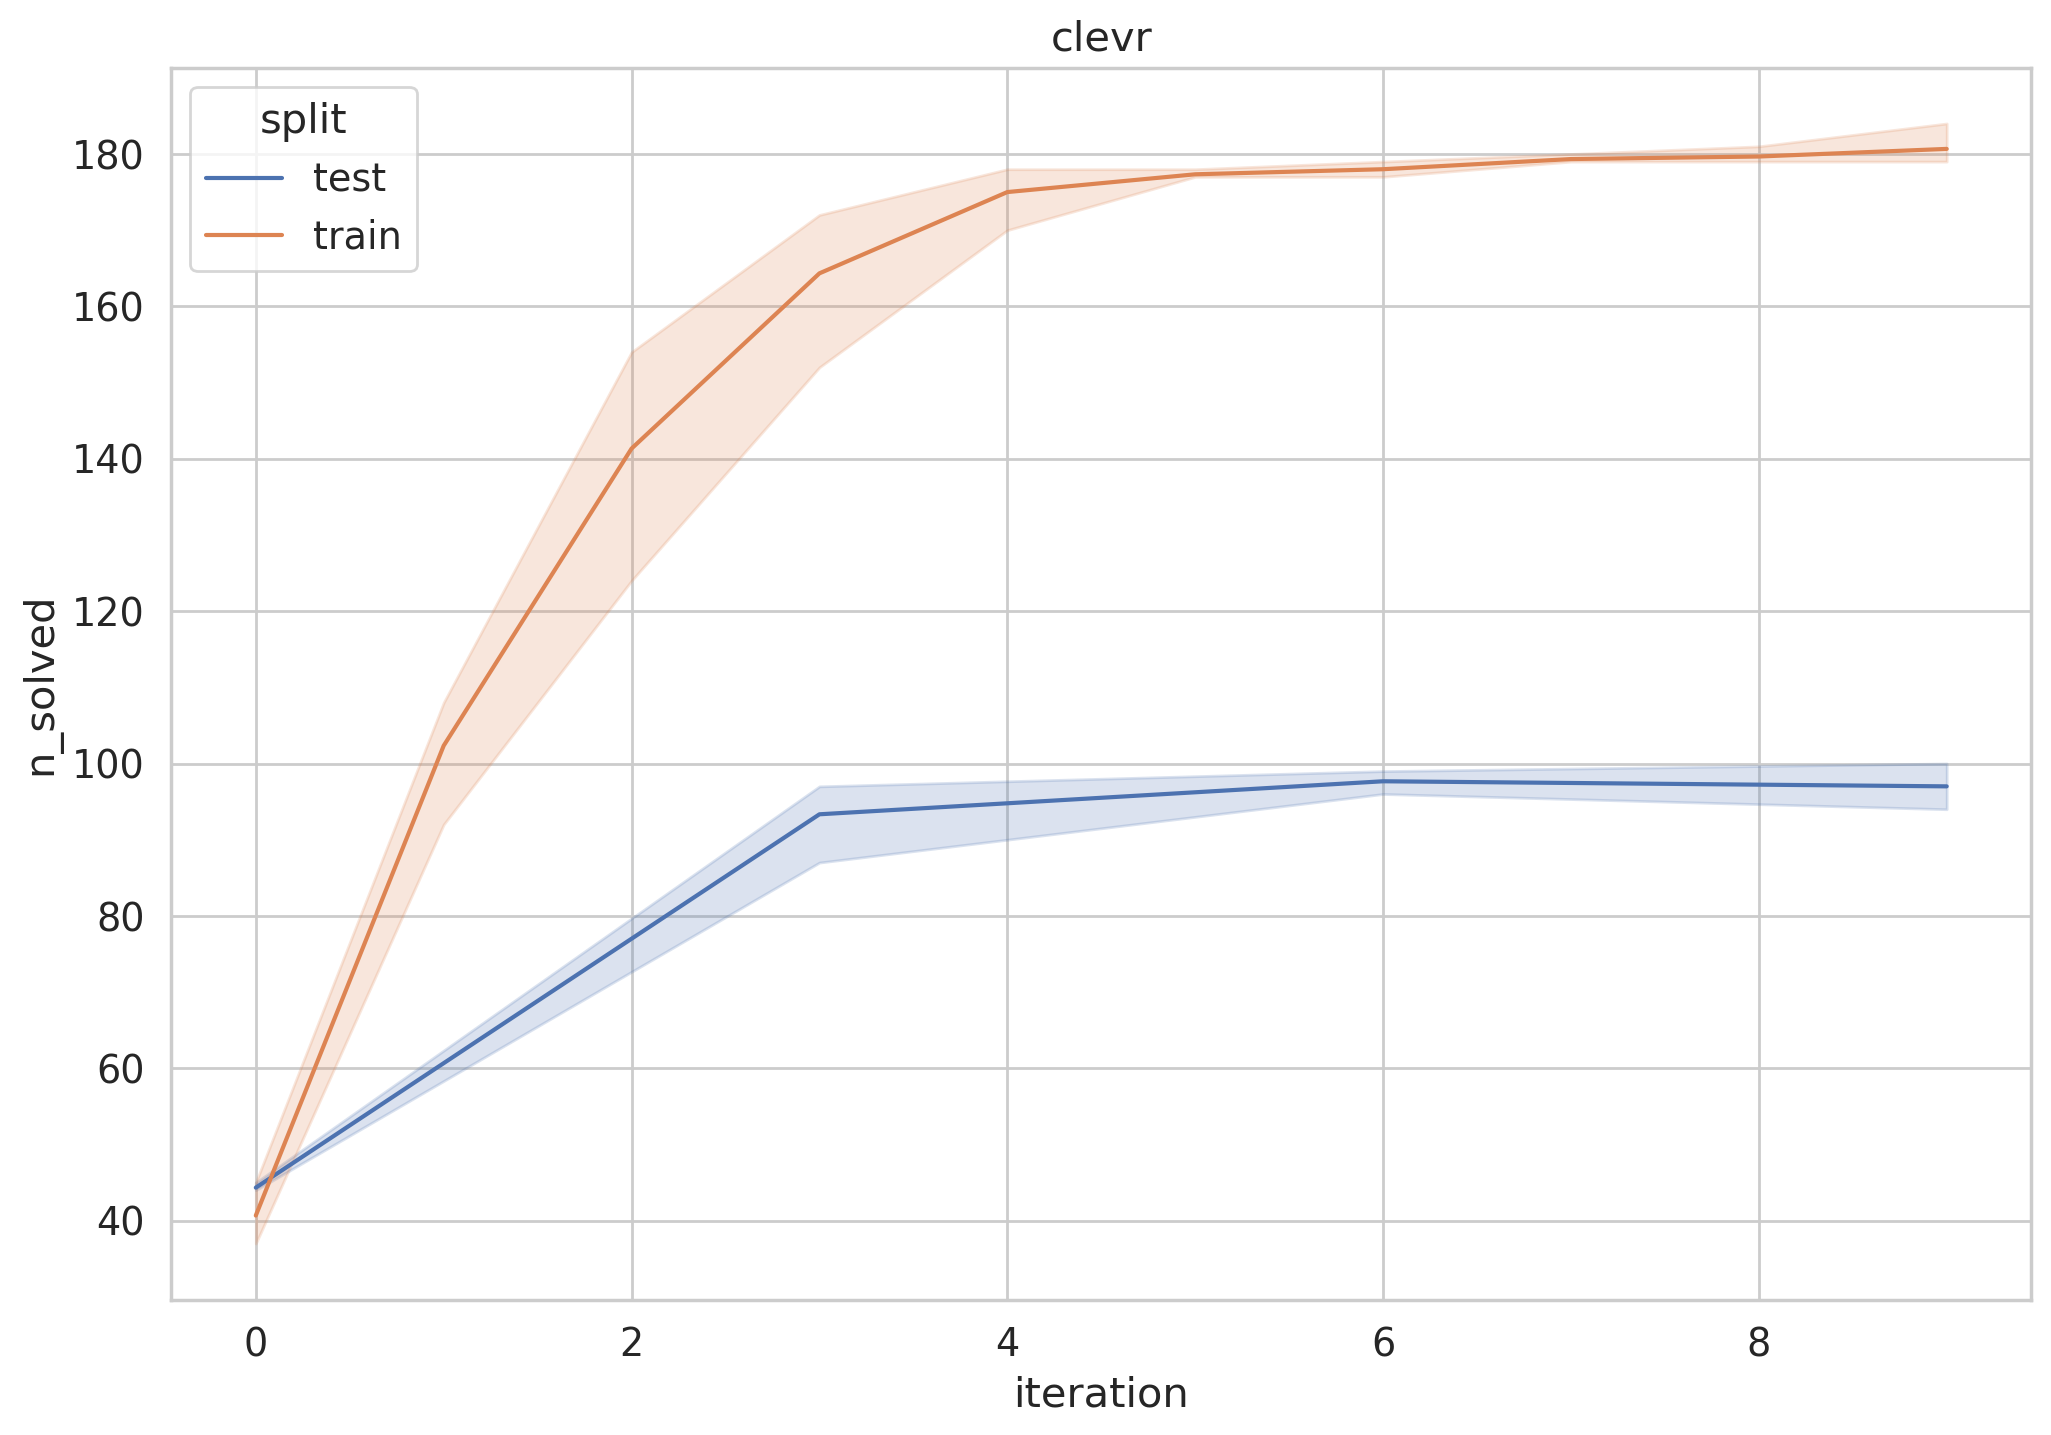

In [29]:
sns.lineplot(
    data=df_results, 
    x="iteration", 
    y="n_solved", 
    hue="split", 
    markers=True,
)
plt.title(f"{DOMAIN}")

### Tasks solved vs. search time

In [30]:
df_search_time = analyzer.get_search_time_results_for_domain(DOMAIN)
df_search_time

Using enumeration_timeout: 1000


,time,n_solved,experiment_type,seed,iteration,split
0,0,0,baseline_dreamcoder,111,0,test
1,1,1,baseline_dreamcoder,111,0,test
2,2,1,baseline_dreamcoder,111,0,test
3,3,2,baseline_dreamcoder,111,0,test
4,4,2,baseline_dreamcoder,111,0,test
...,...,...,...,...,...,...
42037,996,179,baseline_dreamcoder,333,9,train
42038,997,179,baseline_dreamcoder,333,9,train
42039,998,179,baseline_dreamcoder,333,9,train
42040,999,179,baseline_dreamcoder,333,9,train


Text(0.5, 1.0, 'clevr (train)')

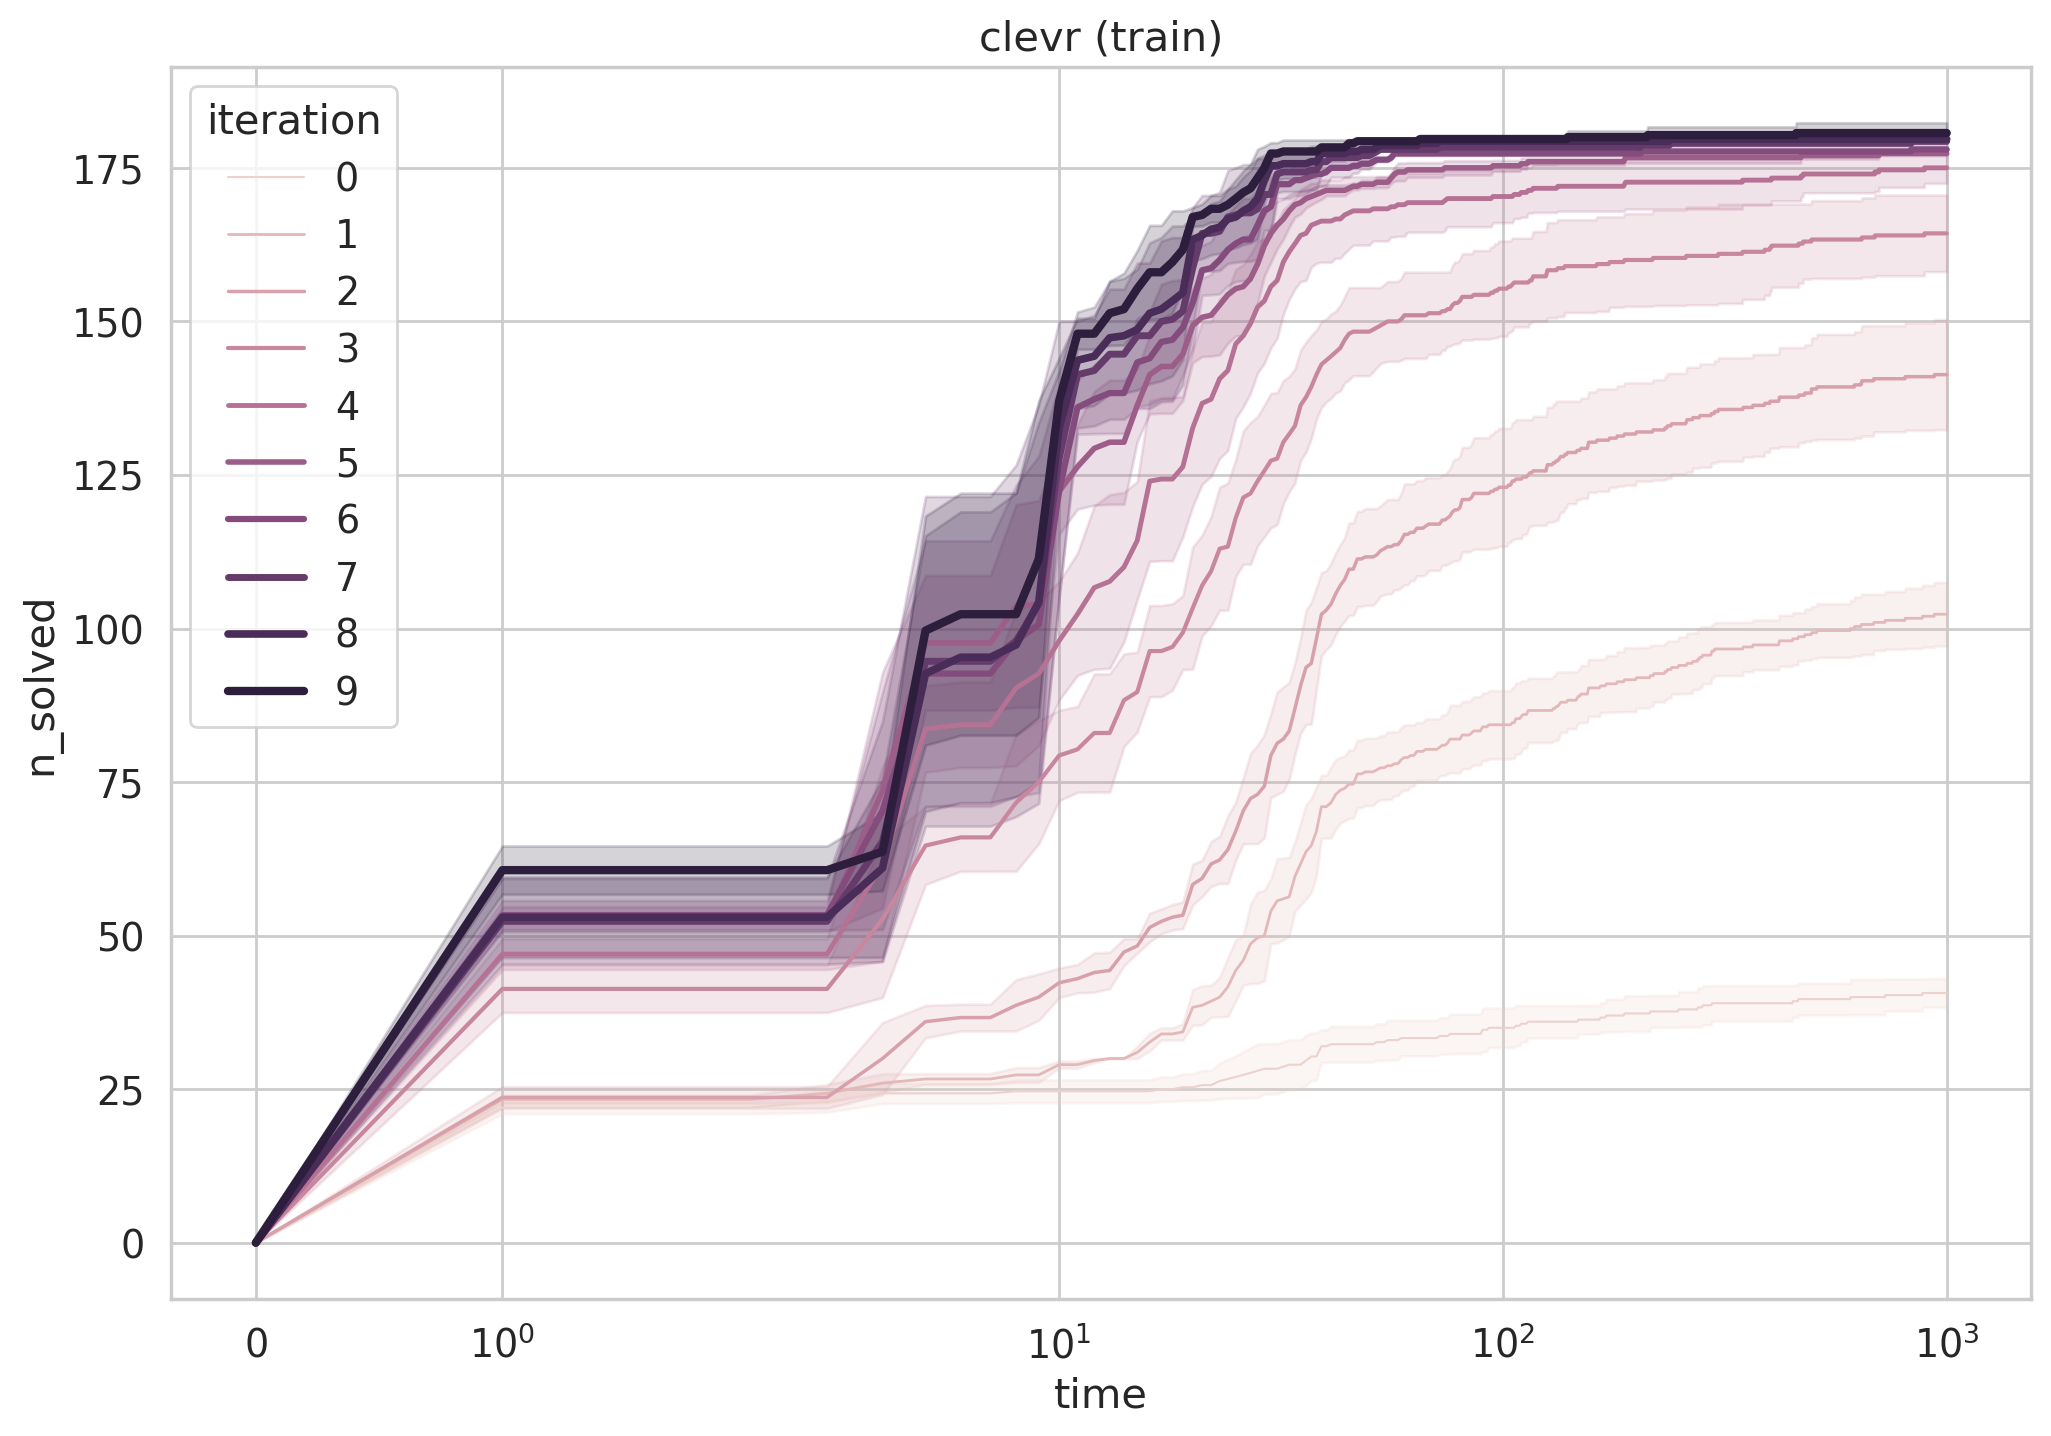

In [31]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "train"],
    x="time",
    y="n_solved",
    # hue="seed",
    hue="iteration",
    size="iteration",
    legend="full",
    errorbar="se",
)
g.set(xscale='symlog')
plt.title(f"{DOMAIN} (train)")

Text(0.5, 1.0, 'clevr (test)')

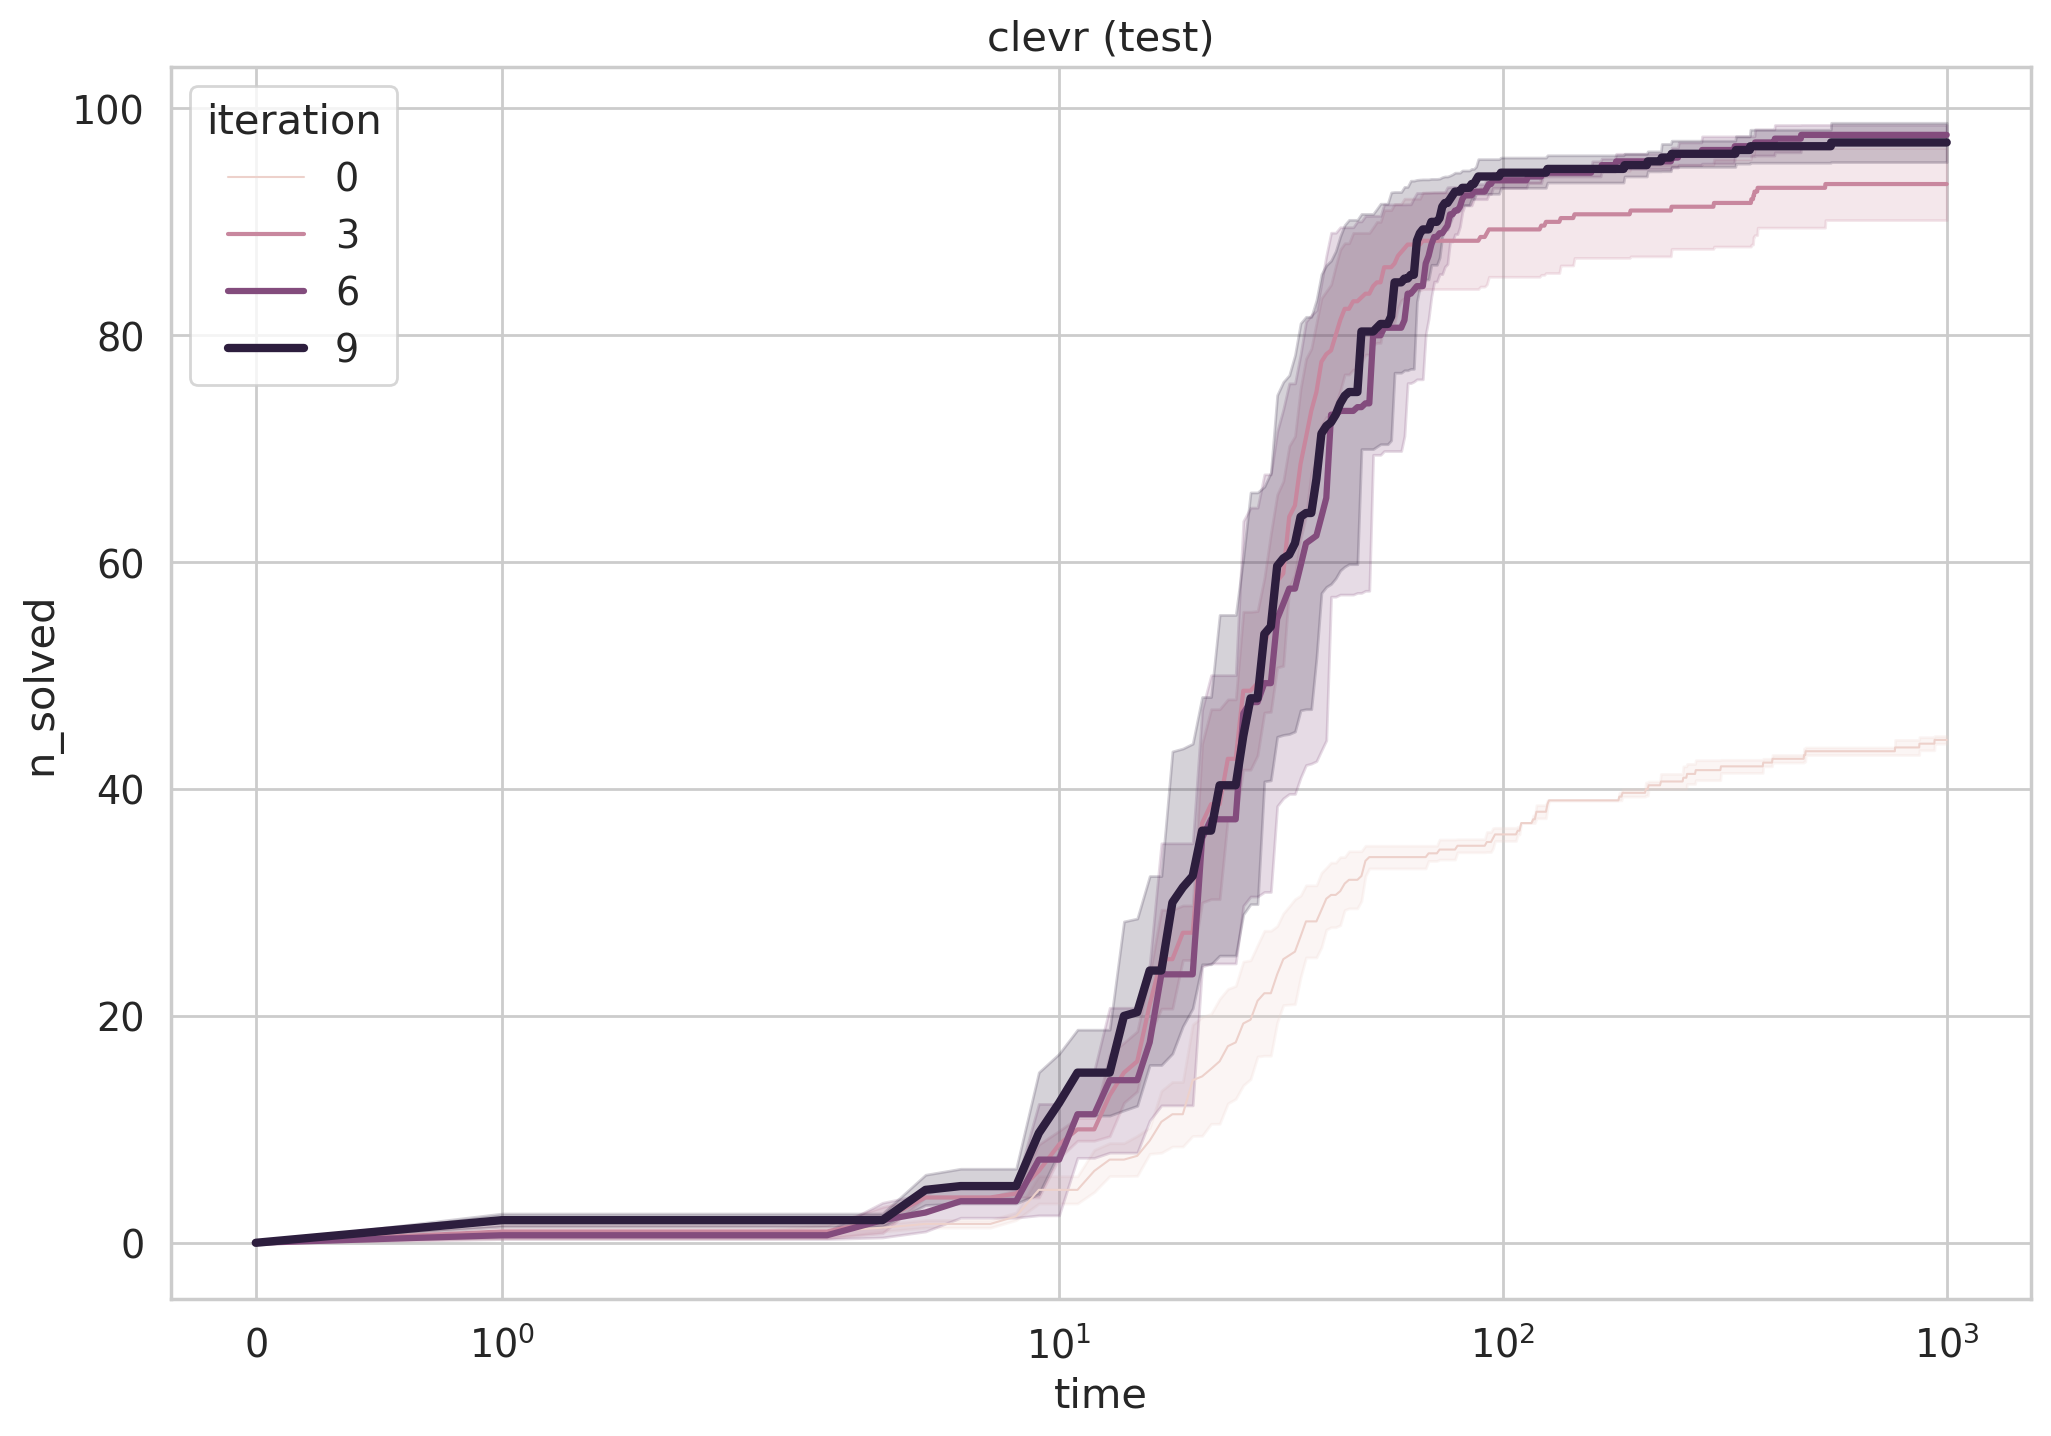

In [32]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "test"],
    x="time",
    y="n_solved",
    # hue="seed",
    hue="iteration",
    size="iteration",
    legend="full",
    errorbar="se",
)
g.set(xscale='symlog')
plt.title(f"{DOMAIN} (test)")

# Analysis 2: Library abstractions

In [33]:
df_asbtractions = analyzer.get_abstractions_for_domain(DOMAIN)
df_asbtractions.to_csv(f"{DOMAIN}_abstractions.csv", index=False)
df_asbtractions

,name,arity,utility,compression_ratio,cumulative_compression_ratio,body,dreamcoder,experiment_type,random_seed,iteration,batch_size
0,fn_0,3,3549,1.074101,1.074101,(clevr_car (clevr_fold #2 #1 (lam (lam (clevr_...,#(lambda (lambda (lambda (clevr_car (clevr_fol...,baseline_dreamcoder,111,0,96
1,fn_1,2,2726,1.060352,1.138926,(clevr_relate (clevr_car #0) #1 #0),#(lambda (lambda (clevr_relate (clevr_car $1) ...,baseline_dreamcoder,111,0,96
2,fn_2,3,2323,1.054219,1.200677,(clevr_if (clevr_eq_shape (clevr_query_shape (...,#(lambda (lambda (lambda (clevr_if (clevr_eq_s...,baseline_dreamcoder,111,0,96
3,fn_3,3,1616,1.039196,1.247738,(clevr_if (clevr_eq_shape clevr_sphere (clevr_...,#(lambda (lambda (lambda (clevr_if (clevr_eq_s...,baseline_dreamcoder,111,0,96
4,fn_4,3,1414,1.035514,1.292051,(clevr_if (clevr_lt? (clevr_count #1) 9) (clev...,#(lambda (lambda (lambda (clevr_if (clevr_lt? ...,baseline_dreamcoder,111,0,96
...,...,...,...,...,...,...,...,...,...,...,...
295,fn_5,1,8201,1.135027,3.796463,(fn_2 (clevr_fold #0 #0 (lam (lam (clevr_map (...,#(lambda (#(lambda (lambda (#(lambda (lambda (...,baseline_dreamcoder,333,9,96
296,fn_6,1,6484,1.119516,4.250203,(fn_0 (lam (clevr_query_material $0)) (lam (cl...,#(lambda (#(lambda (lambda (lambda (clevr_fold...,baseline_dreamcoder,333,9,96
297,fn_7,3,2929,1.057070,4.492762,(clevr_count (clevr_difference (fn_4 #1 #2) (f...,#(lambda (lambda (lambda (clevr_count (clevr_d...,baseline_dreamcoder,333,9,96
298,fn_8,3,1818,1.036724,4.657752,(clevr_if (clevr_eq_shape clevr_cylinder (clev...,#(lambda (lambda (lambda (clevr_if (clevr_eq_s...,baseline_dreamcoder,333,9,96


In [34]:
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
    display(df_asbtractions.sort_values(["name", "iteration"])[["name", "iteration", "arity", "compression_ratio", "dreamcoder"]])

,name,iteration,arity,compression_ratio,dreamcoder
0,fn_0,0,3,1.074101,#(lambda (lambda (lambda (clevr_car (clevr_fold $0 $1 (lambda (lambda (clevr_difference $0 (clevr_relate $1 $4 $0)))))))))
100,fn_0,0,2,1.055270,#(lambda (lambda (clevr_relate (clevr_car $1) $0 $1)))
200,fn_0,0,2,1.097782,#(lambda (lambda (clevr_fold $0 $0 (lambda (lambda (clevr_map (lambda (clevr_if (clevr_eq_color $4 (clevr_query_color $0)) $0 $2)) $0))))))
10,fn_0,1,2,1.126247,#(lambda (lambda (clevr_car (clevr_fold $0 $0 (lambda (lambda (clevr_difference $0 (clevr_relate $1 $3 $0))))))))
110,fn_0,1,2,1.086463,#(lambda (lambda (clevr_relate (clevr_car $1) $0 $1)))
210,fn_0,1,2,1.502557,#(lambda (lambda (clevr_fold $0 $0 (lambda (lambda (clevr_map (lambda (clevr_if (clevr_eq_color $4 (clevr_query_color $0)) $0 $2)) $0))))))
20,fn_0,2,2,1.158784,#(lambda (lambda (clevr_fold $0 $0 (lambda (lambda (clevr_map (lambda (clevr_if (clevr_eq_shape (clevr_query_shape $0) $4) (clevr_transform_size clevr_small $0) $2)) $0))))))
120,fn_0,2,2,1.187513,#(lambda (lambda (clevr_fold $0 $0 (lambda (lambda (clevr_map (lambda (clevr_if (clevr_eq_color (clevr_query_color $0) $4) $0 $2)) $0))))))
220,fn_0,2,3,1.422532,#(lambda (lambda (lambda (clevr_fold $0 $0 (lambda (lambda (clevr_map (lambda (clevr_if ($4 ($5 $0)) $0 $2)) $0)))))))
30,fn_0,3,2,1.194563,#(lambda (lambda (clevr_fold $0 $0 (lambda (lambda (clevr_map (lambda (clevr_if (clevr_eq_shape (clevr_query_shape $0) $4) (clevr_transform_size clevr_small $0) $2)) $0))))))


<AxesSubplot:xlabel='name', ylabel='compression_ratio'>

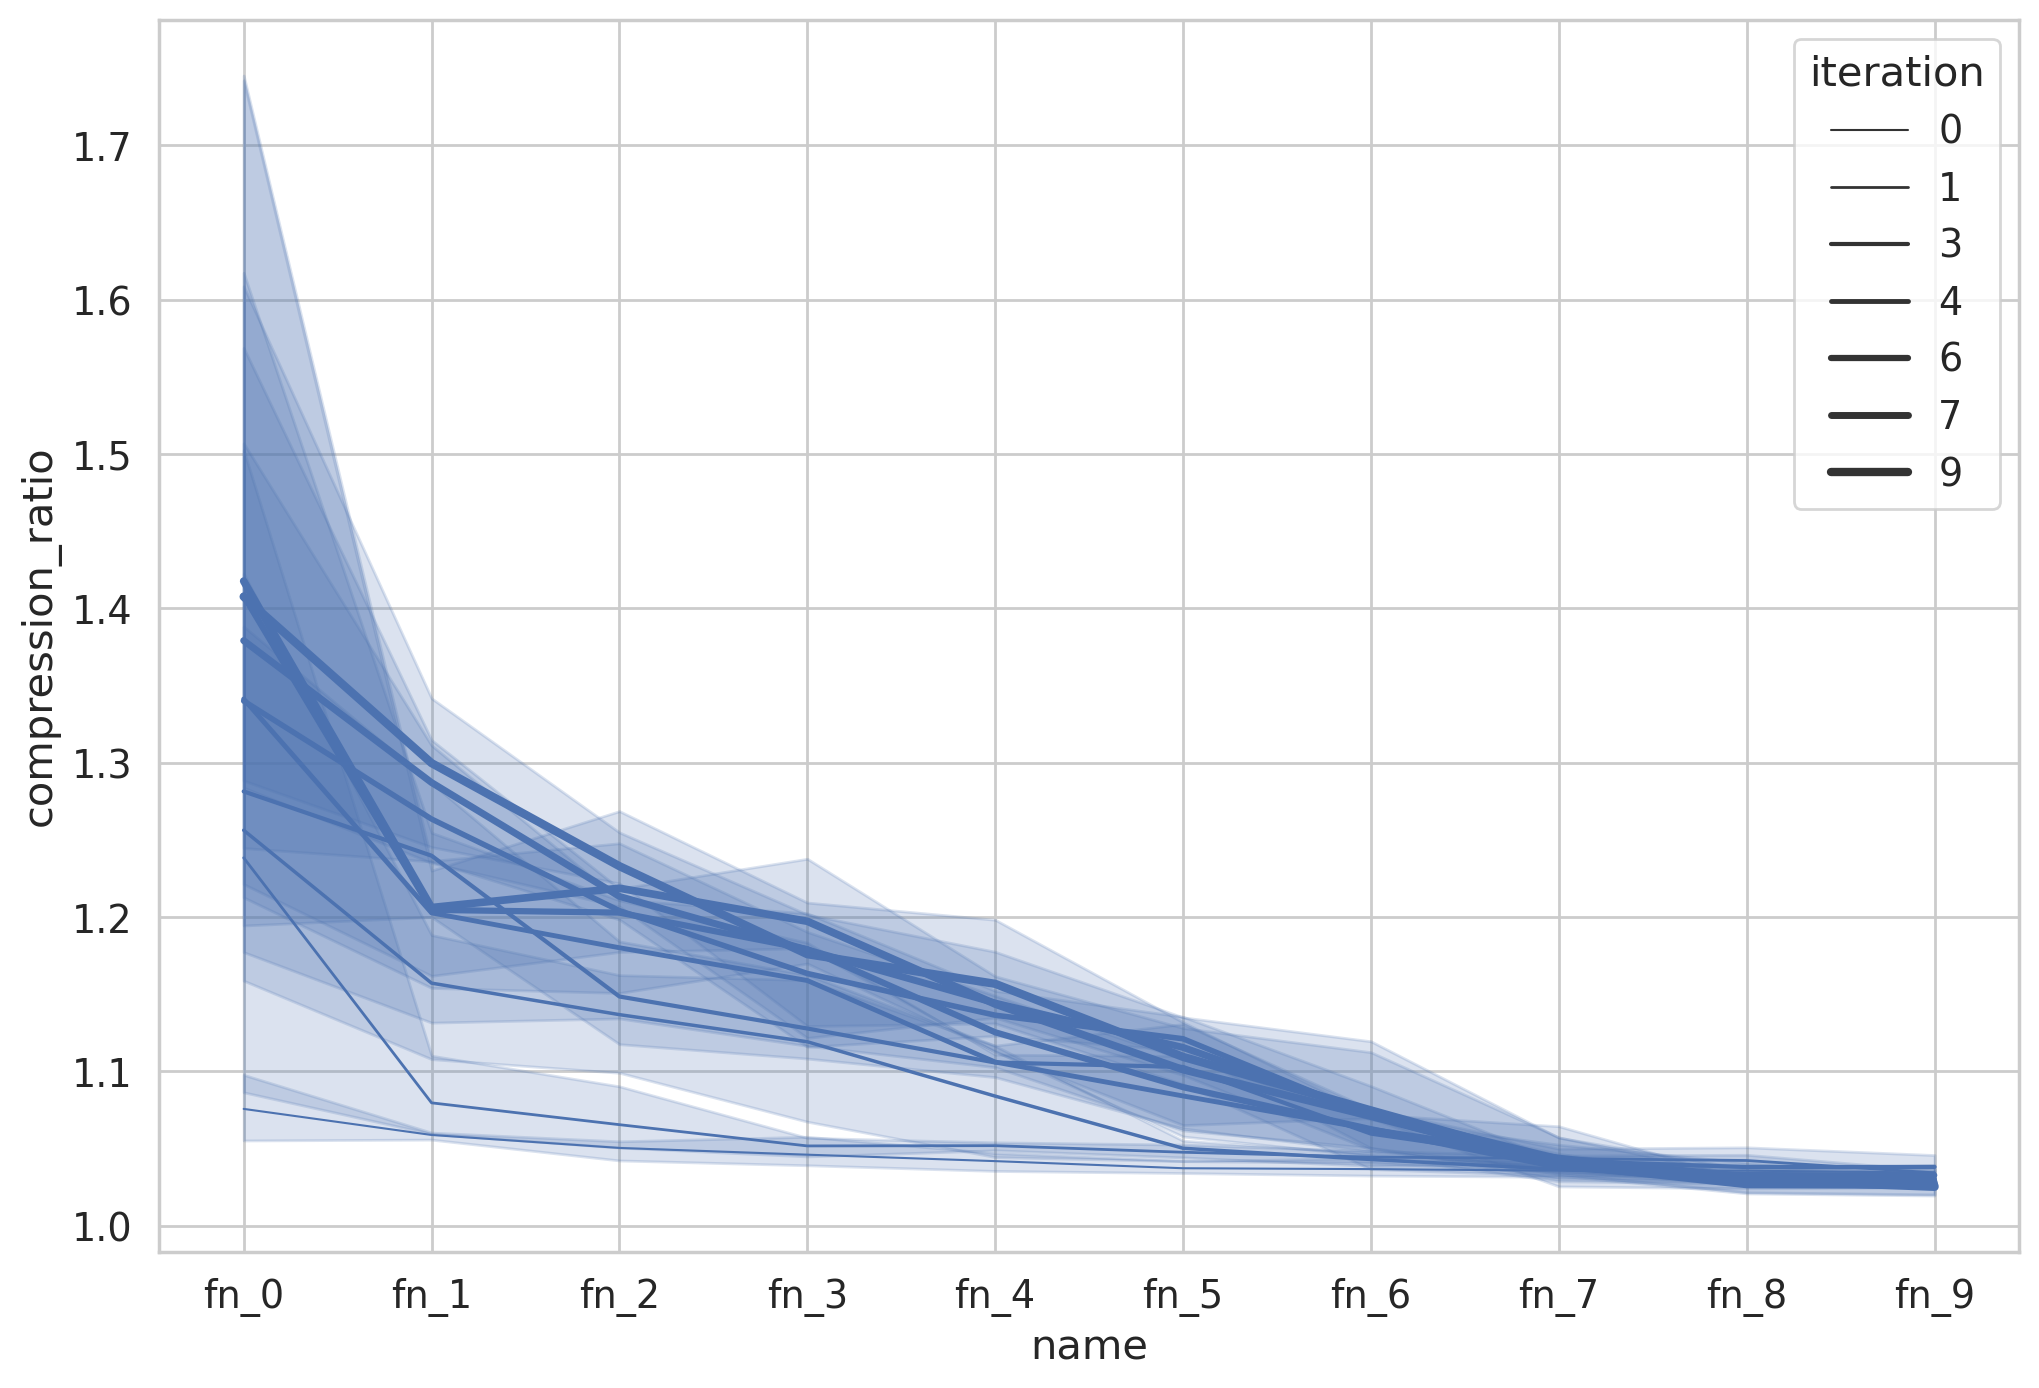

In [35]:
sns.lineplot(data=df_asbtractions, x="name", y="compression_ratio", size="iteration")

Text(0.5, 1.0, 'clevr compressivity of library')

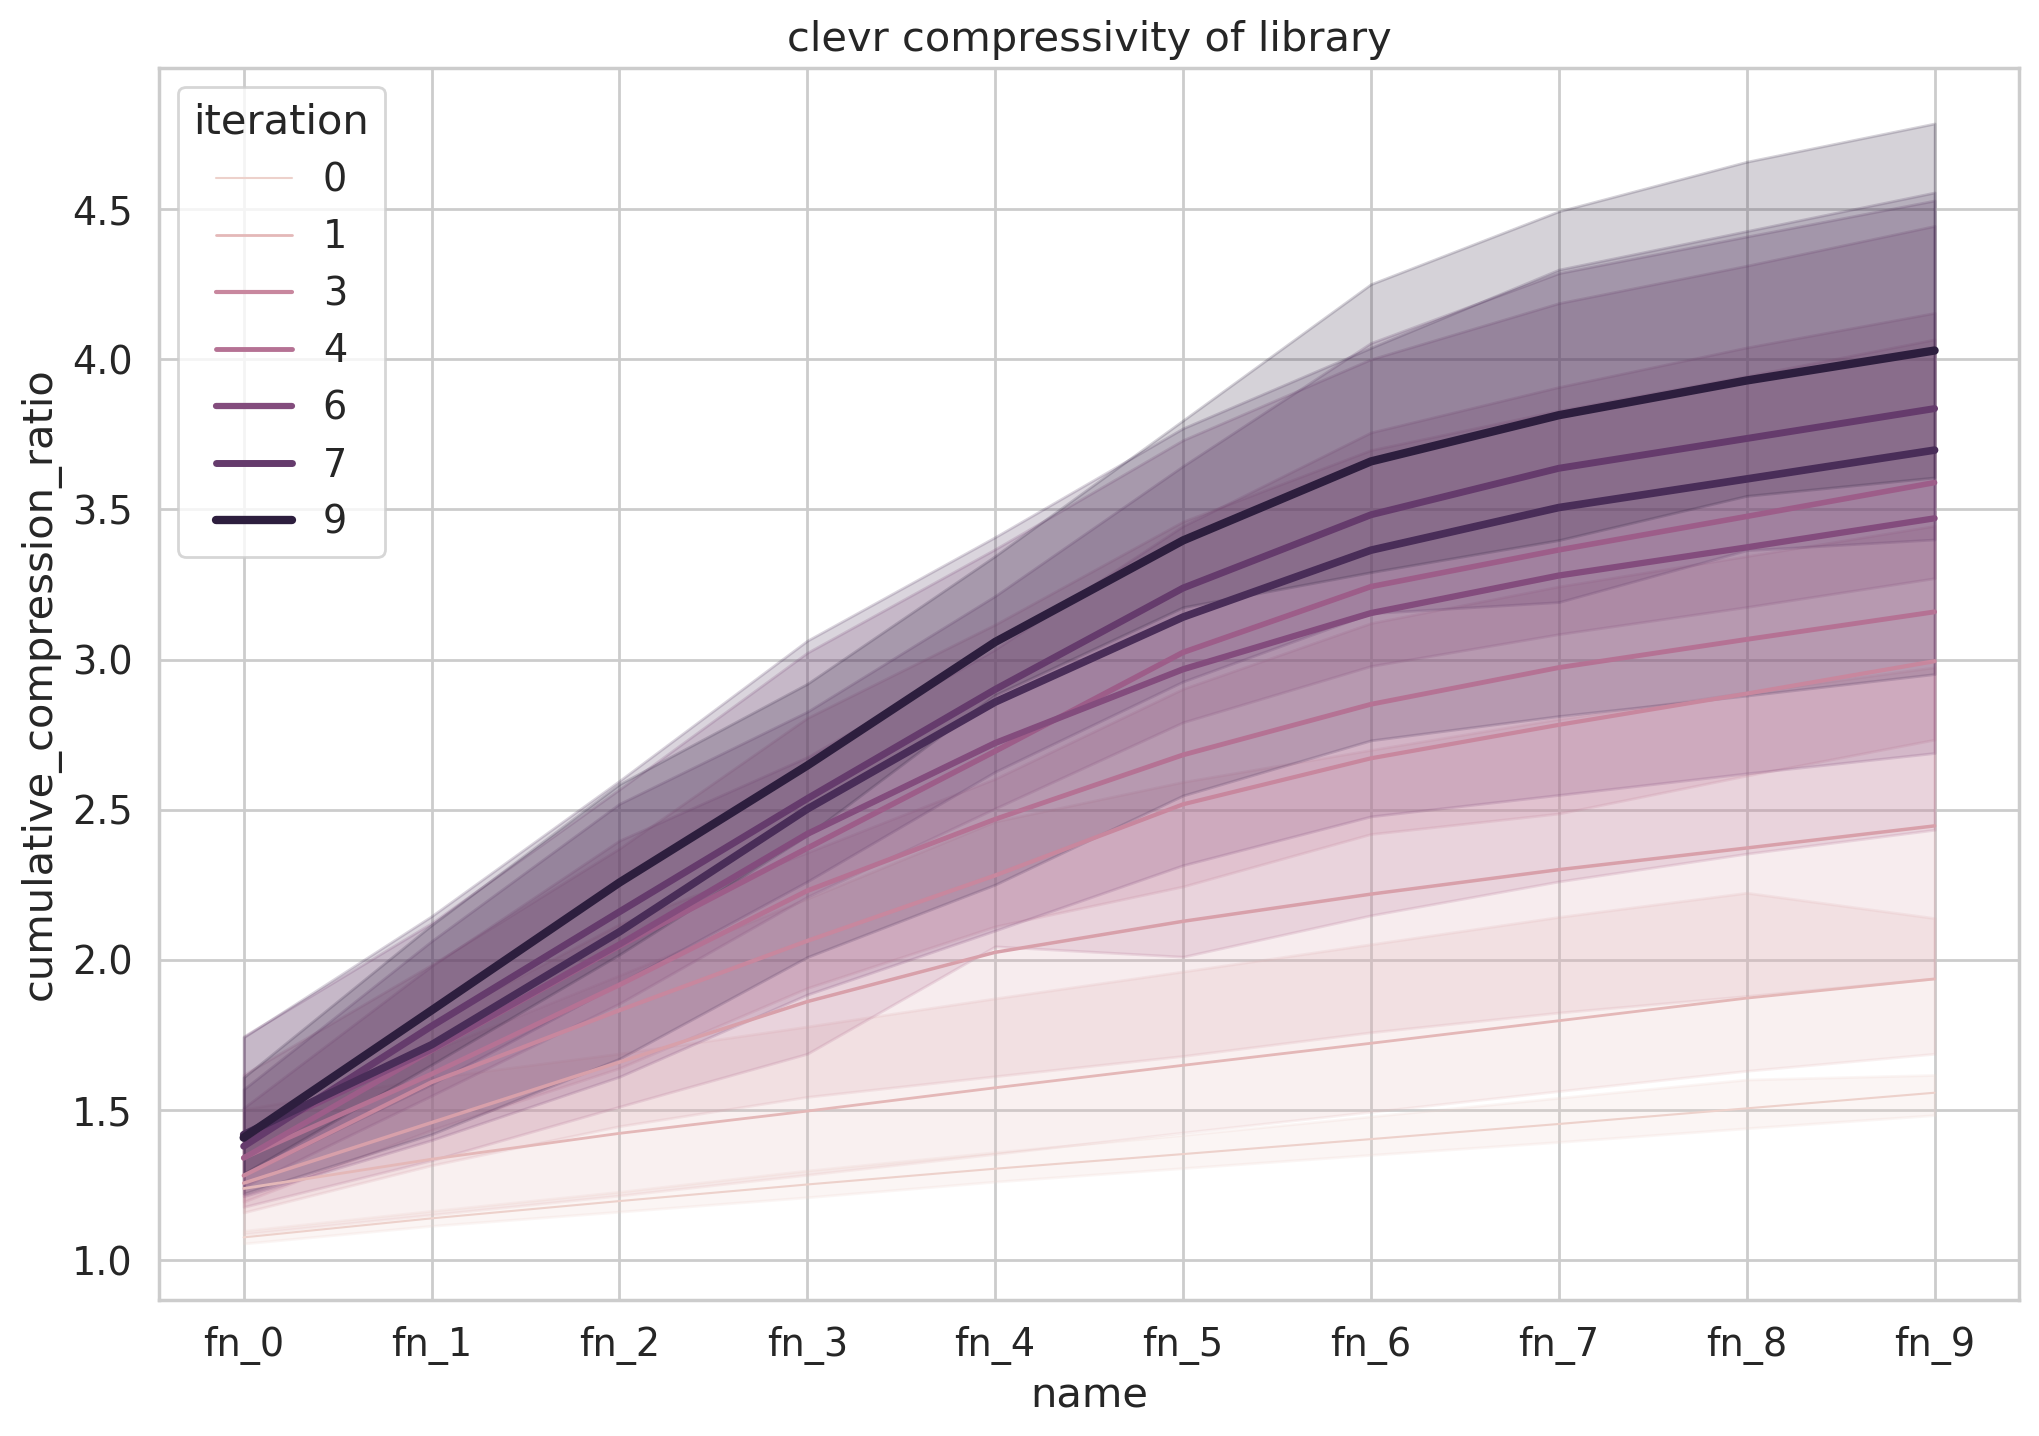

In [36]:
sns.lineplot(data=df_asbtractions, x="name", y="cumulative_compression_ratio", size="iteration", hue="iteration")
plt.title(f"{DOMAIN} compressivity of library")

# Analysis 3: Solved programs

In [37]:
df = analyzer.get_synthesis_results_for_domain(DOMAIN)
df.to_csv(f"{DOMAIN}_search_results.csv")

In [45]:
df[~pd.isnull(df.best_search_time)].query("split == 'train'").query("iteration == 9")

,request,task,programs,best_search_time,split,seed,iteration,experiment_type
5919,"{'constructor': '->', 'arguments': [{'construc...",re2_train_0_if_the_word_ends_with_any_letter_a...,[{'program': '(lambda (#(lambda (lambda (_rfla...,0.000486,train,111,9,baseline_dreamcoder
5922,"{'constructor': '->', 'arguments': [{'construc...",re2_train_3_if_there_is_d_replace_that_with_y,[{'program': '(lambda (#(lambda (lambda (lambd...,41.192231,train,111,9,baseline_dreamcoder
5923,"{'constructor': '->', 'arguments': [{'construc...",re2_train_4_if_there_is_b_add_k_before_that,[{'program': '(lambda (#(lambda (lambda (lambd...,41.280758,train,111,9,baseline_dreamcoder
5930,"{'constructor': '->', 'arguments': [{'construc...",re2_train_11_if_the_word_starts_with_any_lette...,[{'program': '(lambda (#(lambda (lambda (lambd...,5.591696,train,111,9,baseline_dreamcoder
5932,"{'constructor': '->', 'arguments': [{'construc...",re2_train_14_if_there_is_t_replace_that_with_a_x,[{'program': '(lambda (#(lambda (lambda (#(lam...,144.458304,train,111,9,baseline_dreamcoder
...,...,...,...,...,...,...,...,...
20217,"{'constructor': '->', 'arguments': [{'construc...",re2_train_487_if_the_word_starts_with_consonan...,[{'program': '(lambda (#(lambda (lambda (_rfla...,12.836090,train,333,9,baseline_dreamcoder
20220,"{'constructor': '->', 'arguments': [{'construc...",re2_train_490_if_there_is_any_letter_replace_t...,[{'program': '(lambda (#(lambda (lambda (_rfla...,0.000570,train,333,9,baseline_dreamcoder
20221,"{'constructor': '->', 'arguments': [{'construc...",re2_train_491_if_the_word_ends_with_any_letter...,[{'program': '(lambda (#(lambda (lambda (lambd...,0.000827,train,333,9,baseline_dreamcoder
20224,"{'constructor': '->', 'arguments': [{'construc...",re2_train_494_if_the_word_starts_with_any_lett...,[{'program': '(lambda (#(lambda (lambda (lambd...,7.581646,train,333,9,baseline_dreamcoder


In [46]:
df[~pd.isnull(df.best_search_time)].query("split == 'train'").query("iteration == 9").task.sort_values()

5919     re2_train_0_if_the_word_ends_with_any_letter_a...
12829    re2_train_0_if_the_word_ends_with_any_letter_a...
19739    re2_train_0_if_the_word_ends_with_any_letter_a...
6020     re2_train_103_if_the_word_starts_with_any_lett...
12930    re2_train_103_if_the_word_starts_with_any_lett...
                               ...                        
5995     re2_train_78_if_the_word_starts_with_any_lette...
19818    re2_train_81_if_the_word_starts_with_any_lette...
12908    re2_train_81_if_the_word_starts_with_any_lette...
5998     re2_train_81_if_the_word_starts_with_any_lette...
6016      re2_train_99_if_there_is_t_replace_that_with_d_q
Name: task, Length: 373, dtype: object